In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load Data
df = pd.read_excel(r'C:\Users\DELL\OneDrive\Desktop\anomaly_pop\Training_data\SIH_24_data.xlsx')

print(df.dtypes)


SNo.                   int64
Time                  object
Male_Population        int64
Female_Population      int64
Sex_Ratio            float64
dtype: object


# 

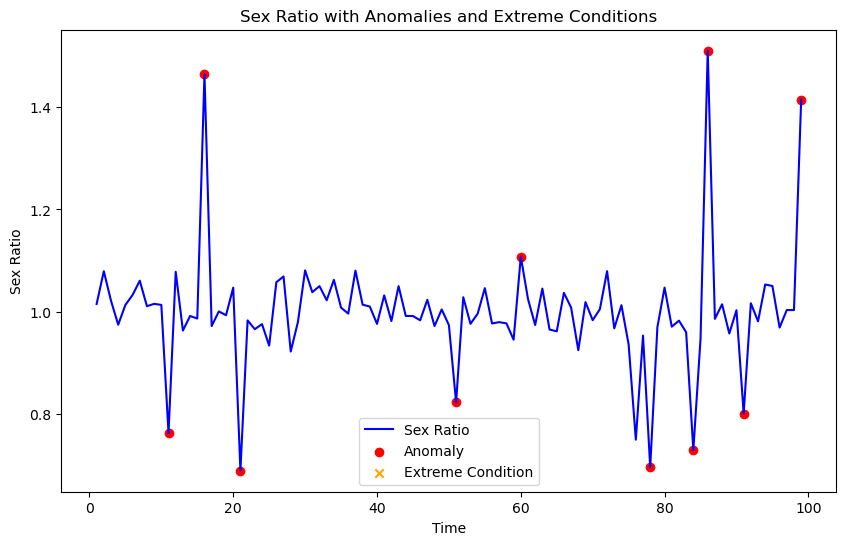

In [8]:
# Calculate Sex Ratio
df['Sex_Ratio'] = df['Female_Population'] / df['Male_Population']

# Isolation Forest Model for Anomaly Detection
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly_Score'] = iso_forest.fit_predict(df[['Sex_Ratio']])

# Flagging Anomalies
df['Anomaly'] = df['Anomaly_Score'] == -1

# Flagging Specific Condition where Population_Female < 0.05 * Population_Male
df['Extreme_Condition'] = df['Sex_Ratio'] < 0.05

# Visualize Anomalies and Extreme Conditions
plt.figure(figsize=(10, 6))

# Plot Sex Ratio
plt.plot(df['SNo.'], df['Sex_Ratio'], label='Sex Ratio', color='blue')

# Highlight Anomalies
plt.scatter(df['SNo.'][df['Anomaly']], df['Sex_Ratio'][df['Anomaly']], color='red', label='Anomaly')

# Highlight Extreme Conditions
plt.scatter(df['SNo.'][df['Extreme_Condition']], df['Sex_Ratio'][df['Extreme_Condition']], color='orange', label='Extreme Condition', marker='x')

# Plot Settings
plt.xlabel('Time')
plt.ylabel('Sex Ratio')
plt.title('Sex Ratio with Anomalies and Extreme Conditions')
plt.legend()
plt.show()
